# Exploratory Data Analysis (EDA) of Toyota Stock Dataset  

In this analysis, we will explore the **Toyota Stock Dataset (1980-2024)** sourced from [Kaggle](https://www.kaggle.com/datasets/mhassansaboor/toyota-motors-stock-data-2980-2024). This dataset provides daily stock trading data for **Toyota Motor Corporation (ticker: TM)**, covering over four decades of market activity.  

Our goal is to conduct an **Exploratory Data Analysis (EDA)** to uncover trends, detect potential anomalies, and prepare the data for further financial analysis or predictive modeling.  

We will analyze key stock metrics such as **adjusted closing prices, opening/closing prices, highs, lows, and trading volumes**.

Let's dive into the data and uncover insights into Toyota's historical stock performance! 🚀

## Import Libraries

Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.dates as mdates

## The Data

Let's start by reading in the Toyota_Data.csv file into a pandas dataframe.

In [3]:
df = pd.read_csv("Toyota_Data.csv")

df.head(21)  

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409
5,1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803
6,1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095
7,1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869
8,1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015
9,1980-03-28,2.315470,3.317985,3.371501,3.317985,0.000000,36438


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [21]:
df.isnull()

,Date,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11286,False,False,False,False,False,False,False
11287,False,False,False,False,False,False,False
11288,False,False,False,False,False,False,False
11289,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Approximately **0%** of the data is missing, indicating a complete dataset with no null values. Since there are no missing values, we don’t need to perform imputation. However, checking the `Volume` column, we notice some values are `0`. This could indicate days with no stock trading activity rather than missing data. We may need to investigate further to determine if these zeros should be treated as valid data points or handled differently.

Let's continue on by visualizing some more of the data!

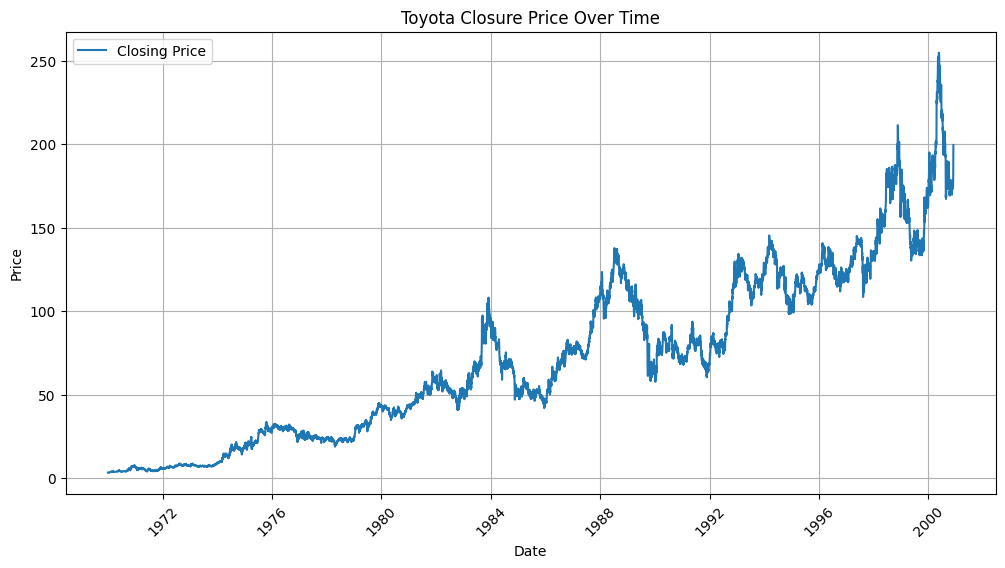

In [ ]:
# Line chart for closing prices

plt.figure(figsize=(12, 6))

# Plotting the closing line
sns.lineplot(data=df, x='Date', y='Close', label='Closing Price')

# Adjusting the X -Axis labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Toyota Closure Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

plt.show()

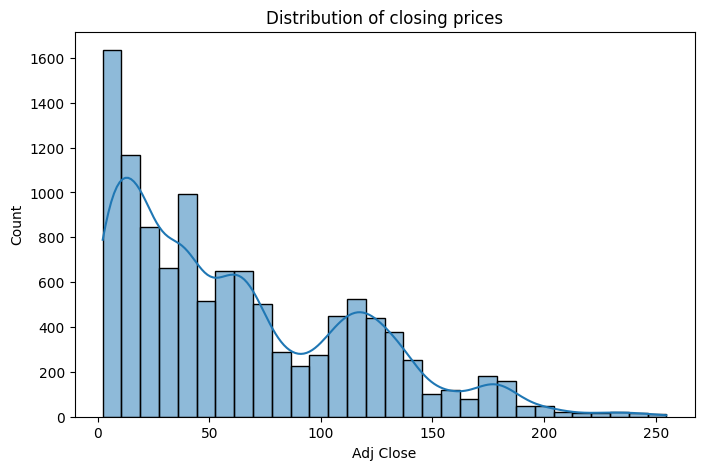

In [15]:
# Distribution of closing prices

plt.figure(figsize=(8, 5))
sns.histplot(df['Adj Close'], bins=30, kde=True)
plt.title('Distribution of closing prices')
plt.show()

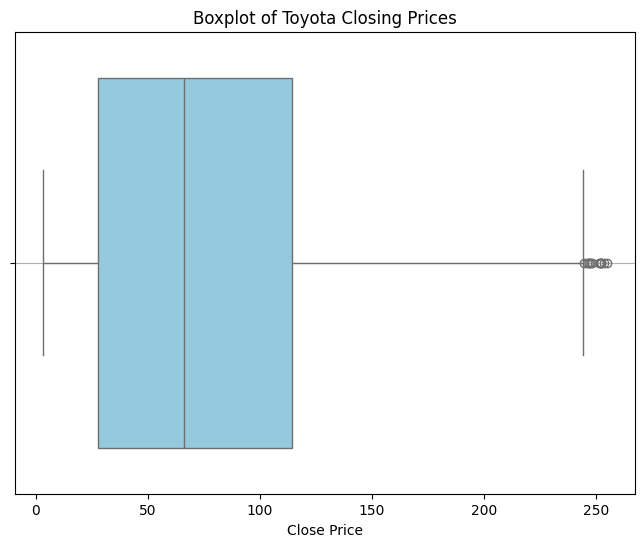

In [16]:
# Create the 'Close' column boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title("Boxplot of Toyota Closing Prices")
plt.xlabel("Close Price")
plt.grid(axis='y')

plt.show()

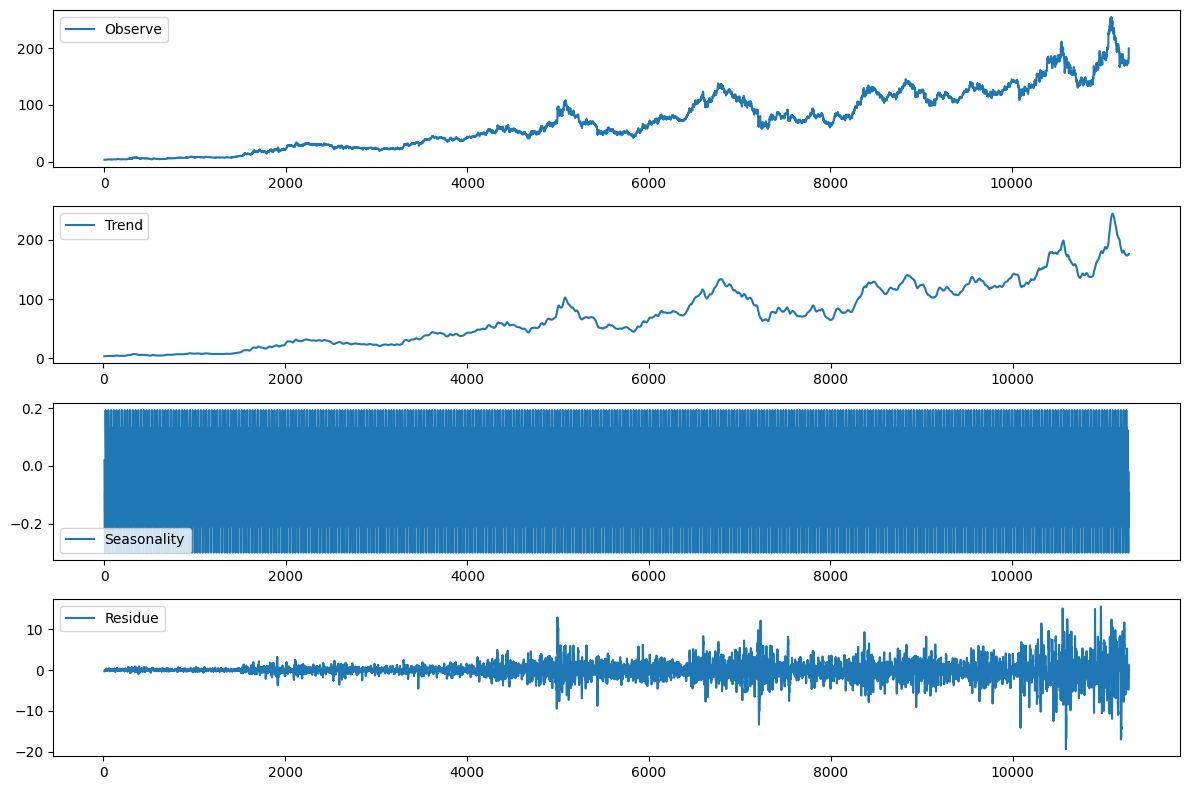

In [11]:
# Trends and seasonality analysis

result = seasonal_decompose(df['Close'], model='additive', period=30)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed, label='Observe')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Residue')
plt.legend()

plt.tight_layout()
plt.show()